<a href="https://colab.research.google.com/github/rhydww/Studi-Independen/blob/Tugas/Rahayu%20Dewi%20A_ML_4_Classification%20Using%20Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity ML-4

Lakukan pemodelan ulang menggunakan dataset yang sama!

1. Gunakan algoritma Decision Tree
2. Pilih 4 dari 8 feature yang tersedia
3. Lakukan tuning hyperparameter hingga mendapat model dengan performa terbaik
4. Generate tree model
5. uat kesimpulan dari activity yang sudah dilakukan

In [ ]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
# load dataset
df = pd.read_csv("patient_dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# memeriksa kelengkapan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**DATA EXPLORATION**

In [ ]:
# pisahkan x dan y dari dataset
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [ ]:
# Hasil pemisahan X dan Y
print(X, '\n')
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]] 

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1

**SPLITTING DATA**

In [ ]:
#Split menjadi 80% training set dan 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

**MODELLING**

In [ ]:
#model dengan hyperparameter default
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train, y_train)

#model dengan tuning hyperparameter
model_DT = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth = 3, 
                                  max_leaf_nodes = 4, 
                                  random_state = 25)
midel_DT = model_DT.fit(X_train, y_train)

**EVALUATION**

Mengevaluasi Performa Model dengan Hyperparameter Default

In [ ]:
# hasil prediksi training set
y_pred_train_default = model_default.predict(X_train)
                                              
# hasil prediksi test set
y_pred_default = model_default.predict(X_test)

# train set score
print("Train Accuracy     : ", metrics.accuracy_score(y_train, y_pred_train_default))
print("Train Precission   : ", metrics.accuracy_score(y_train, y_pred_train_default))
print("Train Recal        : ", metrics.accuracy_score(y_train, y_pred_train_default),'\n')

# test set score
print("Train Accuracy     : ", metrics.accuracy_score(y_test, y_pred_default))
print("Train Precission   : ", metrics.accuracy_score(y_test, y_pred_default))
print("Train Recal        : ", metrics.accuracy_score(y_test, y_pred_default))

Train Accuracy     :  1.0
Train Precission   :  1.0
Train Recal        :  1.0 

Train Accuracy     :  0.7792207792207793
Train Precission   :  0.7792207792207793
Train Recal        :  0.7792207792207793


Mengevaluasi Performa Model dengan Tuning Hyperparameter

In [ ]:
# hasil prediksi training set
y_pred_train = model_DT.predict(X_train)
                                              
# hasil prediksi test set
y_pred = model_DT.predict(X_test)

# train set score
print("Train Accuracy     : ", metrics.accuracy_score(y_train, y_pred_train))
print("Train Precission   : ", metrics.accuracy_score(y_train, y_pred_train))
print("Train Recal        : ", metrics.accuracy_score(y_train, y_pred_train),'\n')

# test set score
print("Train Accuracy     : ", metrics.accuracy_score(y_test, y_pred))
print("Train Precission   : ", metrics.accuracy_score(y_test, y_pred))
print("Train Recal        : ", metrics.accuracy_score(y_test, y_pred))

Train Accuracy     :  0.7719869706840391
Train Precission   :  0.7719869706840391
Train Recal        :  0.7719869706840391 

Train Accuracy     :  0.7727272727272727
Train Precission   :  0.7727272727272727
Train Recal        :  0.7727272727272727


Mengevaluasi Performa Model dengan classification report

In [ ]:
nama_label = ['Tidak Ada Diabetes','Berpotensi diabetes']

print("Classification Report Model dengan Hyperparameter Default : \n")
print(classification_report(y_test, y_pred_default, target_names = nama_label))

print("Classification Report Model dengan Tuning Hyperparameter : \n")
print(classification_report(y_test, y_pred_default, target_names = nama_label))

Classification Report Model dengan Hyperparameter Default : 

                     precision    recall  f1-score   support

 Tidak Ada Diabetes       0.86      0.79      0.82        99
Berpotensi diabetes       0.67      0.76      0.71        55

           accuracy                           0.78       154
          macro avg       0.76      0.78      0.77       154
       weighted avg       0.79      0.78      0.78       154

Classification Report Model dengan Tuning Hyperparameter : 

                     precision    recall  f1-score   support

 Tidak Ada Diabetes       0.86      0.79      0.82        99
Berpotensi diabetes       0.67      0.76      0.71        55

           accuracy                           0.78       154
          macro avg       0.76      0.78      0.77       154
       weighted avg       0.79      0.78      0.78       154



**MEN-GENERATE TREE**

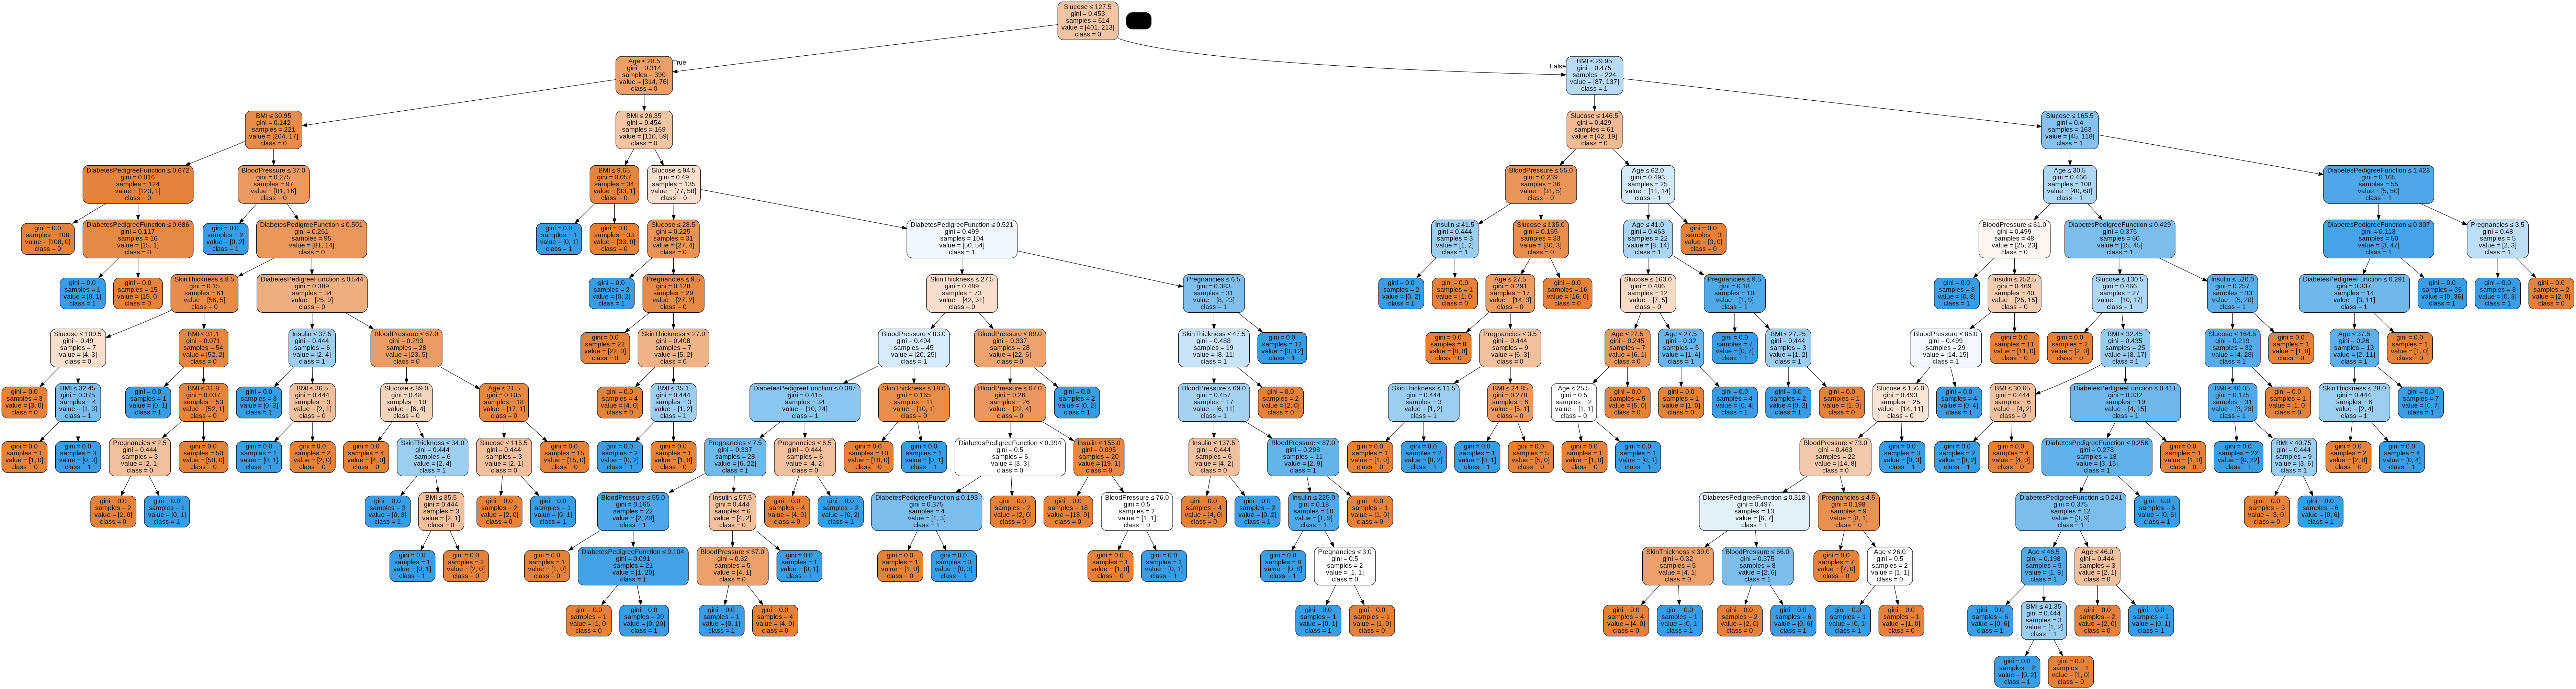

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Pregnancies', 'Slucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_default.png')
Image(graph.create_png())

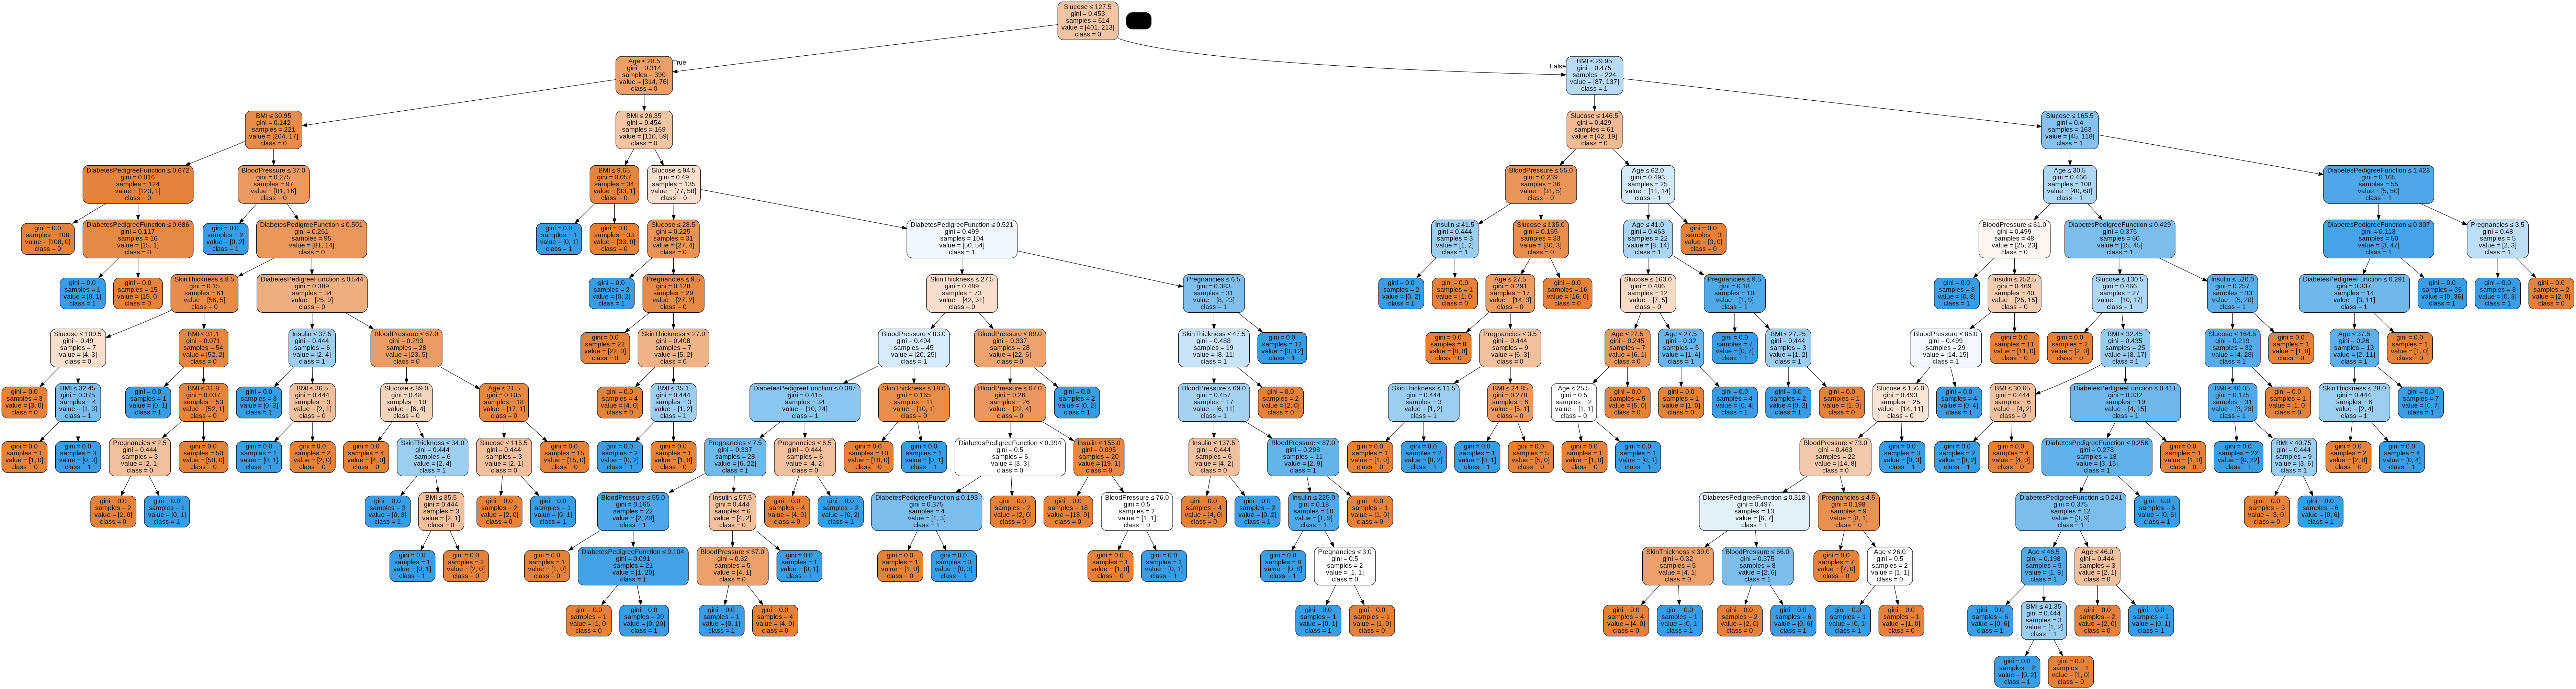

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Pregnancies', 'Slucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

**KESIMPULAN**

In [ ]:
#prediksi dat baru menggunakan model dengan tuning hyperparameter

#Input data baru
pregnancies   = float(input("Input Pregnancies    = "))
Glucose       = float(input("Input Glucose        = "))
BloodPressure = float(input("Input Blood Pressure = "))
SkinThickness = float(input("Input Skin Thickness = "))
Insulin       = float(input("Input Insulin        = "))
BMI           = float(input("Input BMI            = "))
DiabetesPedigreeFunction = float(input("Input Diabetes Pedigree Function = "))
Age           = float(input("Input Age            = "))
data_baru     = [[pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

# memprediksi data baru
hasil_prediksi = model_DT.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

# cetak hasil prediksi
if hasil_prediksi == 0:
  print("\nTidak berpotensi menderita diabetes")
else:
  print("\nBerpotensi Menderita diabetes")

Input Pregnancies    = 19
Input Glucose        = 24
Input Blood Pressure = 12
Input Skin Thickness = 38
Input Insulin        = 37
Input BMI            = 46
Input Diabetes Pedigree Function = 86
Input Age            = 22

Tidak berpotensi menderita diabetes
